<a href="https://colab.research.google.com/github/Alao001/DL/blob/main/Image_classification_with_CNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the Dataset

CIFAR-10
The CIFAR-10 dataset is a dataset commonly used to practice creating image classification models. It consists of 32x32 color images of objects and animals from the following 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The dataset contains 60,000 images, with 50,000 images used for training and 10,000 images used for testing.

Import the dependencies

In [ ]:
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=2)


100%|██████████| 170498071/170498071 [00:10<00:00, 16356144.32it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Visualize the First 10 Images

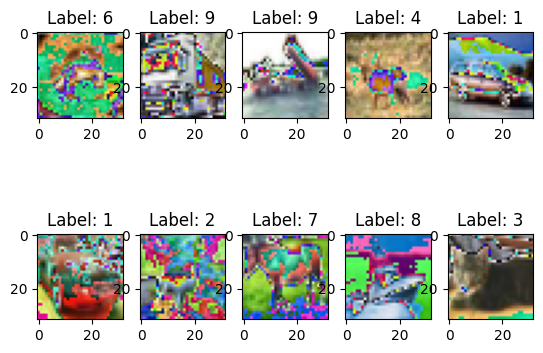

In [ ]:
for i in range(10):
    image, label = train_data[i]

    # Convert the tensor back to PIL Image
    image = transforms.ToPILImage()(image)

    # Display the image
    plt.subplot(2, 5, i + 1)  # Create a subplot grid
    plt.imshow(image)
    plt.title(f"Label: {label}")

plt.show()

In [ ]:
image, label = train_data[0]
print(image.size())

torch.Size([3, 32, 32])


In [ ]:
class_names = ['plane', 'car', 'bird', 'cat', 'door', 'dog','frog', 'horse', 'ship', 'truck']

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    # Creating the Architecture of the network
    self.conv1 = nn.Conv2d(3, 12, kernel_size=5) # (12,28,28)
    self.pool = nn.MaxPool2d(2, 2) #(12,14,14)
    self.conv2 = nn.Conv2d(12,24,5) # (24,10,10)
    self.fc1 = nn.Linear(24 * 5 *5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

Building Convolutional Neural Network

Train the model

In [ ]:
net = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(30):
  print(f'training epoch {epoch}....')
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print(f'loss: {running_loss / len(train_loader):.4f}')

training epoch 0....
loss: 2.2231
training epoch 1....
loss: 1.7704
training epoch 2....
loss: 1.5429
training epoch 3....
loss: 1.4105
training epoch 4....
loss: 1.3109
training epoch 5....
loss: 1.2312
training epoch 6....
loss: 1.1672
training epoch 7....
loss: 1.1110
training epoch 8....
loss: 1.0640
training epoch 9....
loss: 1.0181
training epoch 10....
loss: 0.9773
training epoch 11....
loss: 0.9395
training epoch 12....
loss: 0.9063
training epoch 13....
loss: 0.8686
training epoch 14....
loss: 0.8391
training epoch 15....
loss: 0.8072
training epoch 16....
loss: 0.7786
training epoch 17....
loss: 0.7513
training epoch 18....
loss: 0.7266
training epoch 19....
loss: 0.6998
training epoch 20....
loss: 0.6736
training epoch 21....
loss: 0.6517
training epoch 22....
loss: 0.6249
training epoch 23....
loss: 0.6030
training epoch 24....
loss: 0.5856
training epoch 25....
loss: 0.5626
training epoch 26....
loss: 0.5429
training epoch 27....
loss: 0.5216
training epoch 28....
loss: 0.

In [ ]:
#save the model
torch.save(net.state_dict(), 'image_class_net.pth')


In [ ]:
net = NeuralNet()
net.load_state_dict(torch.load('image_class_net.pth'))

<ipython-input-18-973dd52dec69>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('image_class_net.pth'))


<All keys matched successfully>

In [ ]:
# make prediction
correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
acc = 100 * correct / total
print(f'Accuracy of the network on test images: {acc} %')

Accuracy of the network on test images: 68.23 %


In [ ]:
new_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
def load_image(image_path):
    image = Image.open(image_path)
    image = new_transform(image)
    image = image.unsqueeze(0)
    return image
image_path = ['/content/car.jpg','/content/horse.jpg','/content/ship.jpg']
images = [load_image(img) for img in image_path ]

net.eval()
with torch.no_grad():
  for image in images:
    output = net(image)
    _, predicted = torch.max(output, 1)
    predicted_class = class_names[predicted.item()]
    print(f'Predicted class: {predicted_class}')

Predicted class: car
Predicted class: horse
Predicted class: ship
